In [24]:
import math
import numpy as np
import os
import pathlib
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow_examples.models.pix2pix import pix2pix

In [15]:
print(tf.__version__)

2.18.0


In [21]:
#data_dir = pathlib.Path('../data/isod/data')
#images_filenames = [str(i) for i in sorted(data_dir.glob('*/rgb/*.png'))]
#masks_filenames = [str(i) for i in sorted(data_dir.glob('*/label/*.png'))]
data_dir = pathlib.Path('../data/isod')
images_filenames = [str(i) for i in sorted(data_dir.glob('all-rgbs/*.png'))]
masks_filenames = [str(i) for i in sorted(data_dir.glob('all-labels/*.png'))]
print(f"{len(images_filenames)=} {len(masks_filenames)=}")

len(images_filenames)=2000 len(masks_filenames)=2000


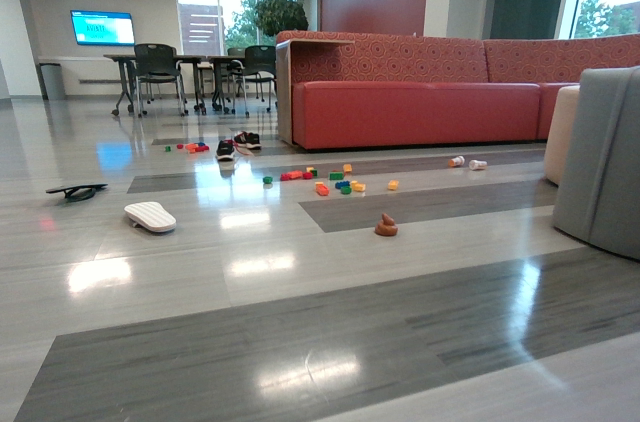

In [22]:
PIL.Image.open(images_filenames[1999])

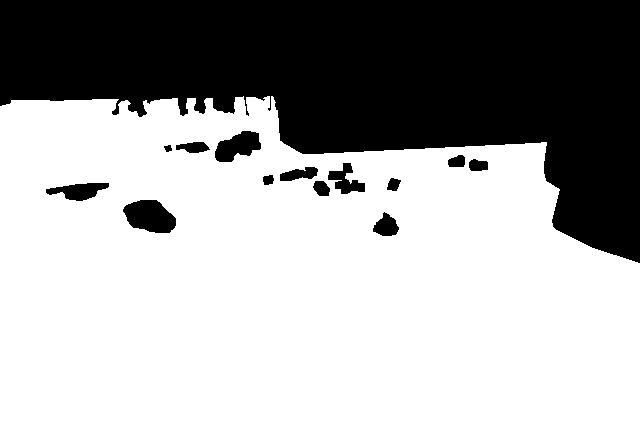

In [23]:
PIL.Image.open(masks_filenames[1999])

In [25]:
#images_filenames_shuffled, masks_filenames_shuffled = shuffle(images_filenames, masks_filenames)

# saving the shuffled files
# we can load them later using images_filenames_shuffled = np.load('images_filenames_shuffled.npy')
#np.save('images_filenames_shuffled.npy', images_filenames_shuffled)
#np.save('masks_filenames_shuffled.npy', masks_filenames_shuffled)

In [81]:
images_filenames_shuffled = np.load('images_filenames_shuffled.npy')
masks_filenames_shuffled = np.load('masks_filenames_shuffled.npy')

In [82]:
print(f"{len(images_filenames_shuffled)=} {len(masks_filenames_shuffled)=}")

len(images_filenames_shuffled)=2000 len(masks_filenames_shuffled)=2000


In [83]:
X_train_filenames, X_val_filenames, Y_train_filenames, Y_val_filenames = train_test_split(
    np.array(images_filenames_shuffled), np.array(masks_filenames_shuffled), test_size=0.2, random_state=1)

In [84]:
IMAGE_HEIGHT, IMAGE_WIDTH = 128, 128

In [85]:
class Isod_Custom_Generator(keras.utils.Sequence):
    def __init__(self, image_filenames, mask_filenames, batch_size) :
        self.image_filenames = image_filenames
        self.mask_filenames = mask_filenames
        self.batch_size = batch_size

    def __len__(self) :
        return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(int)

    def __getitem__(self, idx) :
        batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
        batch_y = self.mask_filenames[idx * self.batch_size : (idx+1) * self.batch_size]

        return np.array([
                            np.resize(mpl.image.imread(str(file_name)), (IMAGE_HEIGHT, IMAGE_WIDTH, 3))
                            for file_name in batch_x
                        ])/255.0, \
               np.array([
                            np.resize(mpl.image.imread(str(file_name)), (IMAGE_HEIGHT, IMAGE_WIDTH, 1))
                            for file_name in batch_y
                        ])/255.0

In [86]:
BATCH_SIZE=32

training_batch_generator = Isod_Custom_Generator(X_train_filenames, Y_train_filenames, BATCH_SIZE)
val_batch_generator = Isod_Custom_Generator(X_val_filenames, Y_val_filenames, BATCH_SIZE)

In [87]:
#training and fine-tuning
STEPS_PER_EPOCH = 800//BATCH_SIZE
VALIDATION_STEPS = 200//BATCH_SIZE
hist_1 = unet.fit(training_batch_generator,
               validation_data=val_batch_generator,
               steps_per_epoch=STEPS_PER_EPOCH,
               validation_steps=VALIDATION_STEPS,
               epochs=20,
               verbose=2)

Epoch 1/20


I0000 00:00:1742443509.165022  259966 service.cc:148] XLA service 0x7a7f44002bb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742443509.165039  259966 service.cc:156]   StreamExecutor device (0): Quadro RTX 5000 with Max-Q Design, Compute Capability 7.5
2025-03-20 15:05:09.491869: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
W0000 00:00:1742443510.228420  259966 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1742443510.941510  259966 cuda_dnn.cc:529] Loaded cuDNN version 90800
E0000 00:00:1742443516.868037  259966 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1742443516.994755  2599

25/25 - 35s - 1s/step - accuracy: 0.9587 - loss: 0.1783 - val_accuracy: 0.9780 - val_loss: 0.3190
Epoch 2/20
25/25 - 6s - 242ms/step - accuracy: 0.9828 - loss: 0.0297 - val_accuracy: 0.9780 - val_loss: 0.1747
Epoch 3/20
25/25 - 6s - 253ms/step - accuracy: 0.9824 - loss: 0.0089 - val_accuracy: 0.9780 - val_loss: 0.0866
Epoch 4/20
25/25 - 6s - 239ms/step - accuracy: 0.9811 - loss: 0.0029 - val_accuracy: 0.9780 - val_loss: 0.0402
Epoch 5/20
25/25 - 6s - 258ms/step - accuracy: 0.9820 - loss: 0.0011 - val_accuracy: 0.9780 - val_loss: 0.0187
Epoch 6/20
25/25 - 6s - 237ms/step - accuracy: 0.9815 - loss: 5.0798e-04 - val_accuracy: 0.9780 - val_loss: 0.0091
Epoch 7/20
25/25 - 7s - 261ms/step - accuracy: 0.9805 - loss: 2.9334e-04 - val_accuracy: 0.9780 - val_loss: 0.0047
Epoch 8/20
25/25 - 6s - 248ms/step - accuracy: 0.9830 - loss: 2.0120e-04 - val_accuracy: 0.9780 - val_loss: 0.0025
Epoch 9/20
25/25 - 6s - 256ms/step - accuracy: 0.9817 - loss: 1.5252e-04 - val_accuracy: 0.9780 - val_loss: 0.001

In [58]:
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization

In [59]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu',input_shape=(128,128,3)))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (5,5), activation ='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 128, kernel_size = (5,5), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256, kernel_size = (5,5), activation ='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 256, kernel_size = (5,5), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = "relu")) #Fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation = "relu")) #Fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

# model.add(Dense(12, activation = "softmax")) #Classification layer or output layer

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/home/ngu145/miniconda/envs/tf/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 124, 124, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 120, 120, 64)   │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 22, 22, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 22, 22, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 18, 18, 256)    │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 9, 9, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     5,308,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 8,526,784 (32.53 MB)

 Trainable params: 8,524,224 (32.52 MB)

 Non-trainable params: 2,560 (10.00 KB)

In [60]:
model.fit_generator(generator=training_batch_generator,
                   steps_per_epoch = int(3800 // BATCH_SIZE),
                   epochs = 10,
                   verbose = 1,
                   validation_data = val_batch_generator,
                   validation_steps = int(950 // BATCH_SIZE))

AttributeError: 'Sequential' object has no attribute 'fit_generator'

In [171]:
# def get_images(images_filenames, num_channels):
#     images = []
#     for filename in tqdm(images_filenames):
#         file = tf.io.read_file(filename)
#         image = tf.image.decode_png(file, channels=num_channels, dtype=tf.uint8)
#         images.append(image)

#     return images

In [172]:
# images = get_images(images_filenames, 3)

100%|██████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:08<00:00, 248.37it/s]


In [173]:
# masks = get_images(masks_filenames, 1)

100%|█████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1155.77it/s]


In [174]:
def show_images(images, start, end):
    
    plt.figure(figsize=(32, 10))
    n_cols = 4
    n_rows = int(math.ceil((end-start+1)/n_cols))
    for i in range(start, end+1):
        plt.subplot(n_rows, n_cols, i-start+1)
        img = images[i]
        plt.imshow(img)
        plt.axis('off')

    plt.show()

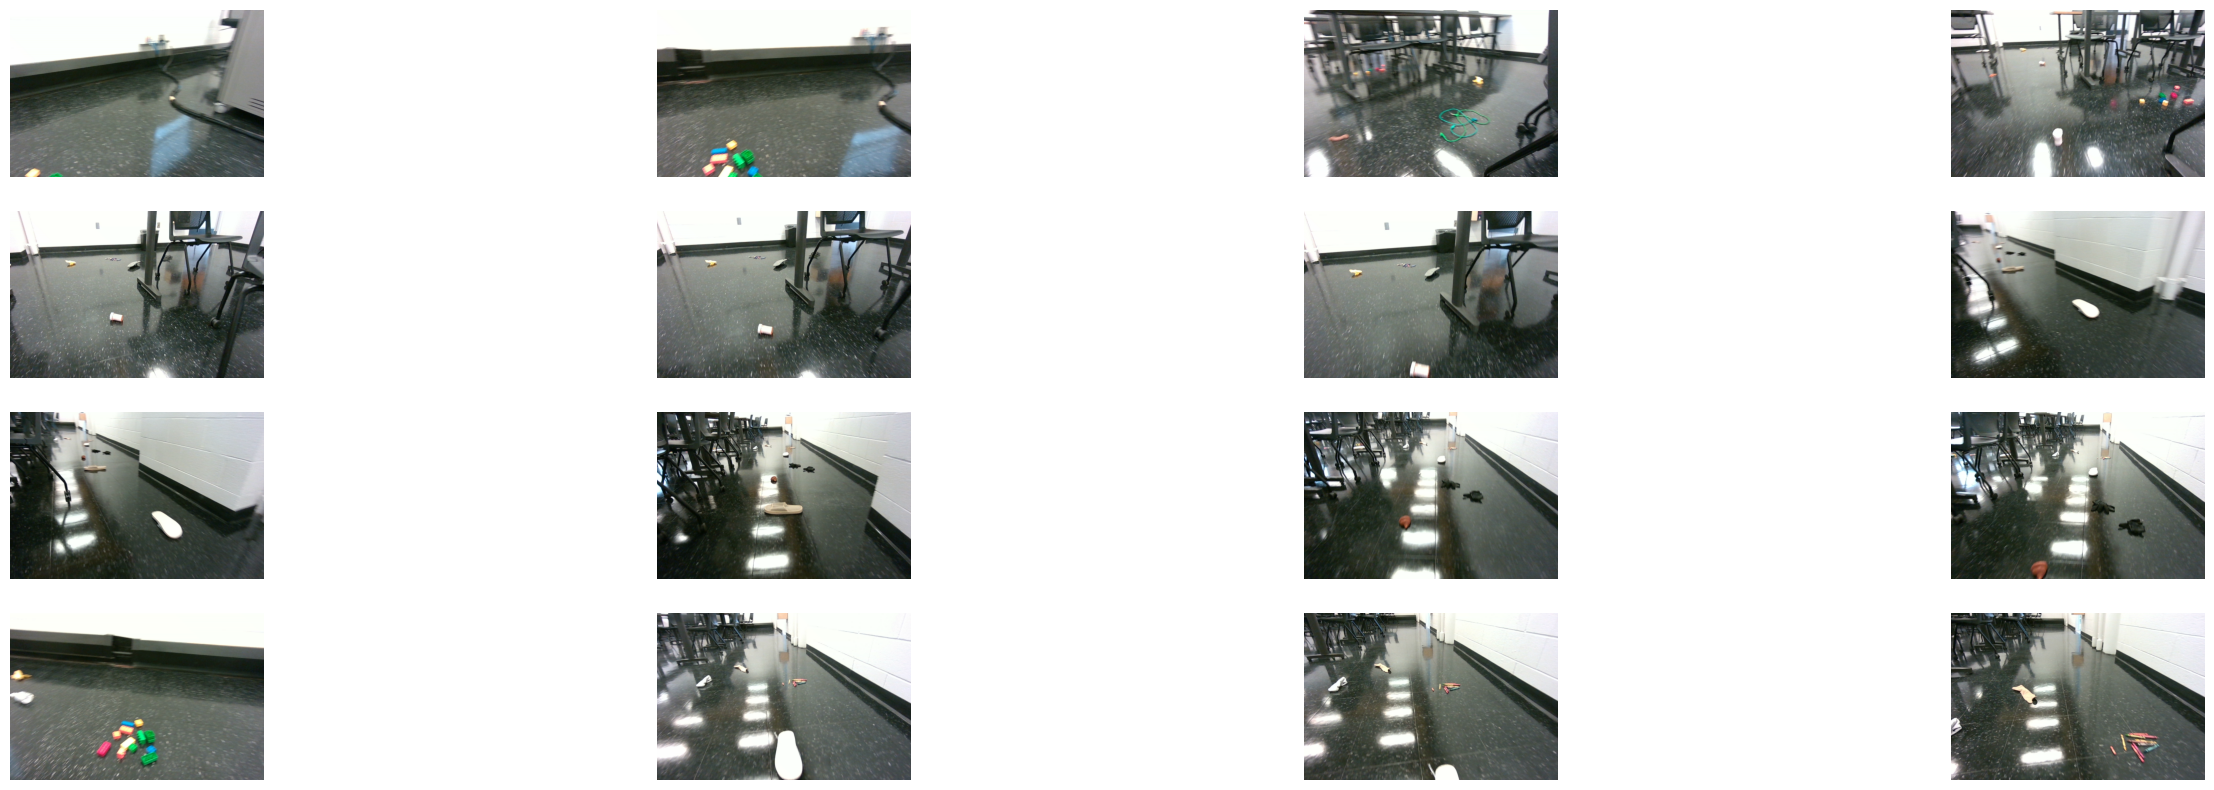

In [175]:
show_images(images, 0, 15)

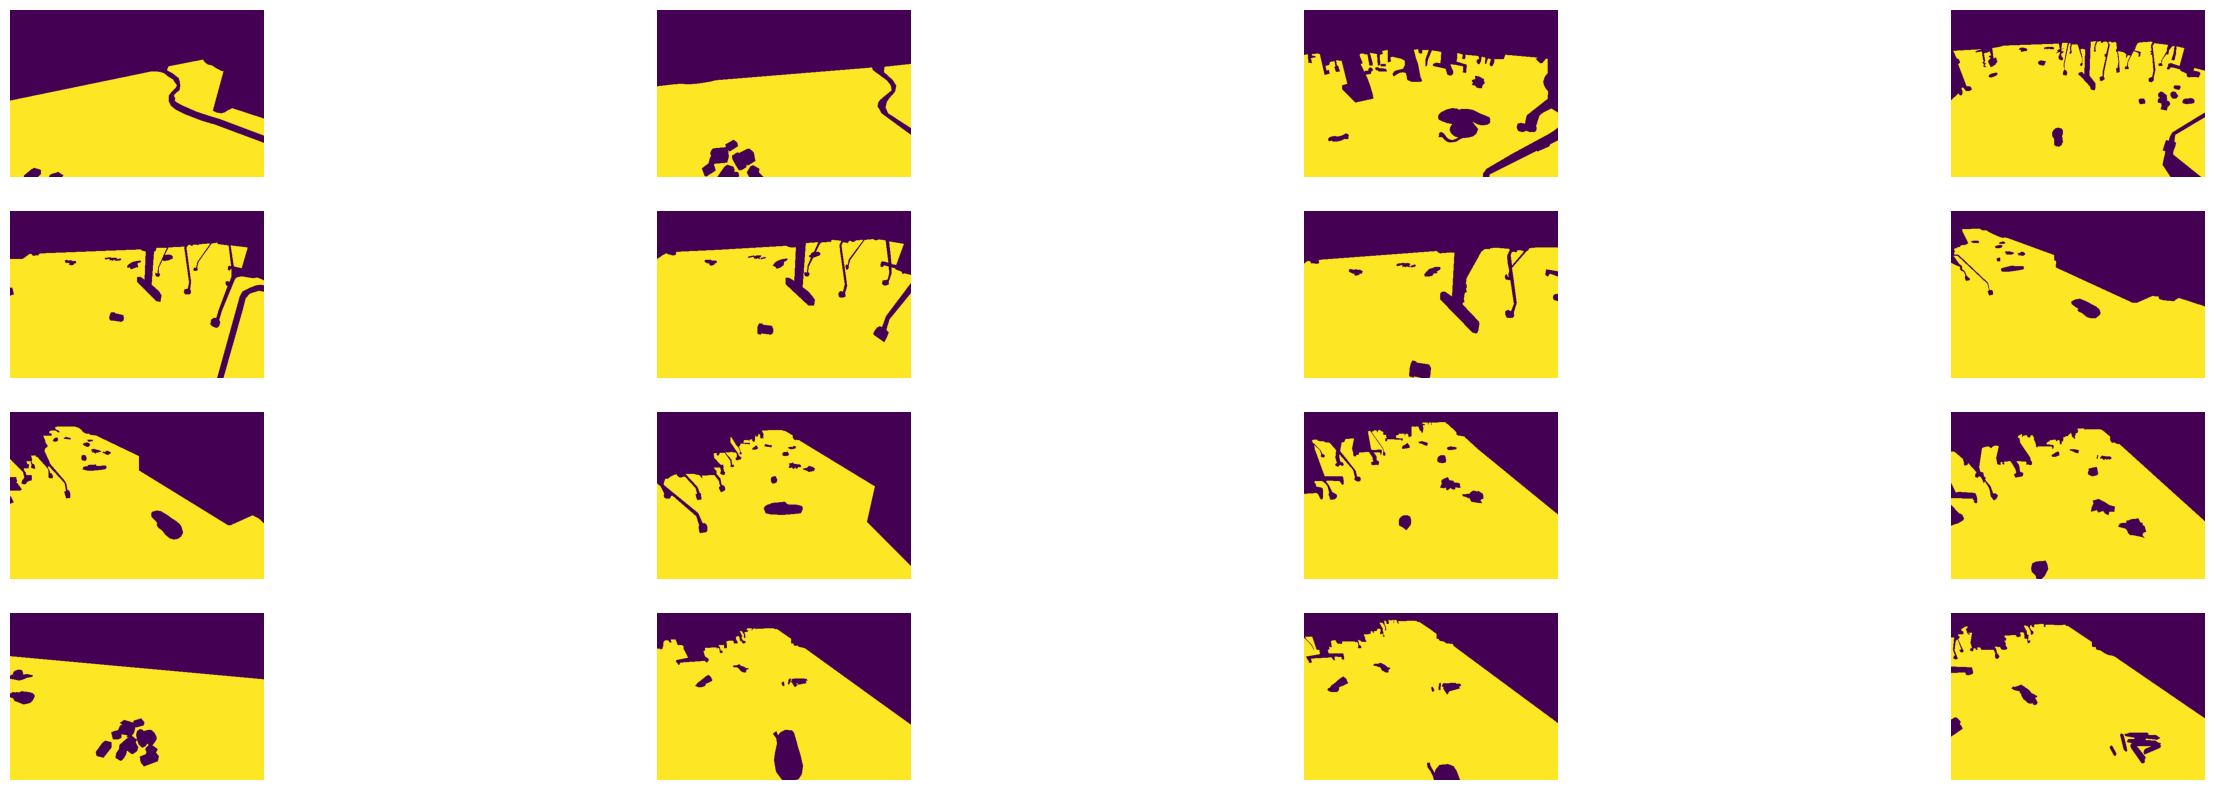

In [176]:
show_images(masks, 0, 15)

In [178]:
def resize_image(image):
    image = tf.cast(image, tf.float32)
    image = image/255.0
    image = tf.image.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

    return image

In [179]:
def resize_mask(mask):
    mask = tf.image.resize(mask, (IMAGE_HEIGHT, IMAGE_WIDTH))
    mask = tf.cast(mask, tf.uint8)

    return mask

In [180]:
X = [resize_image(i) for i in images]
y = [resize_mask(m) for m in masks]
len(X), len(y) 

(2000, 2000)

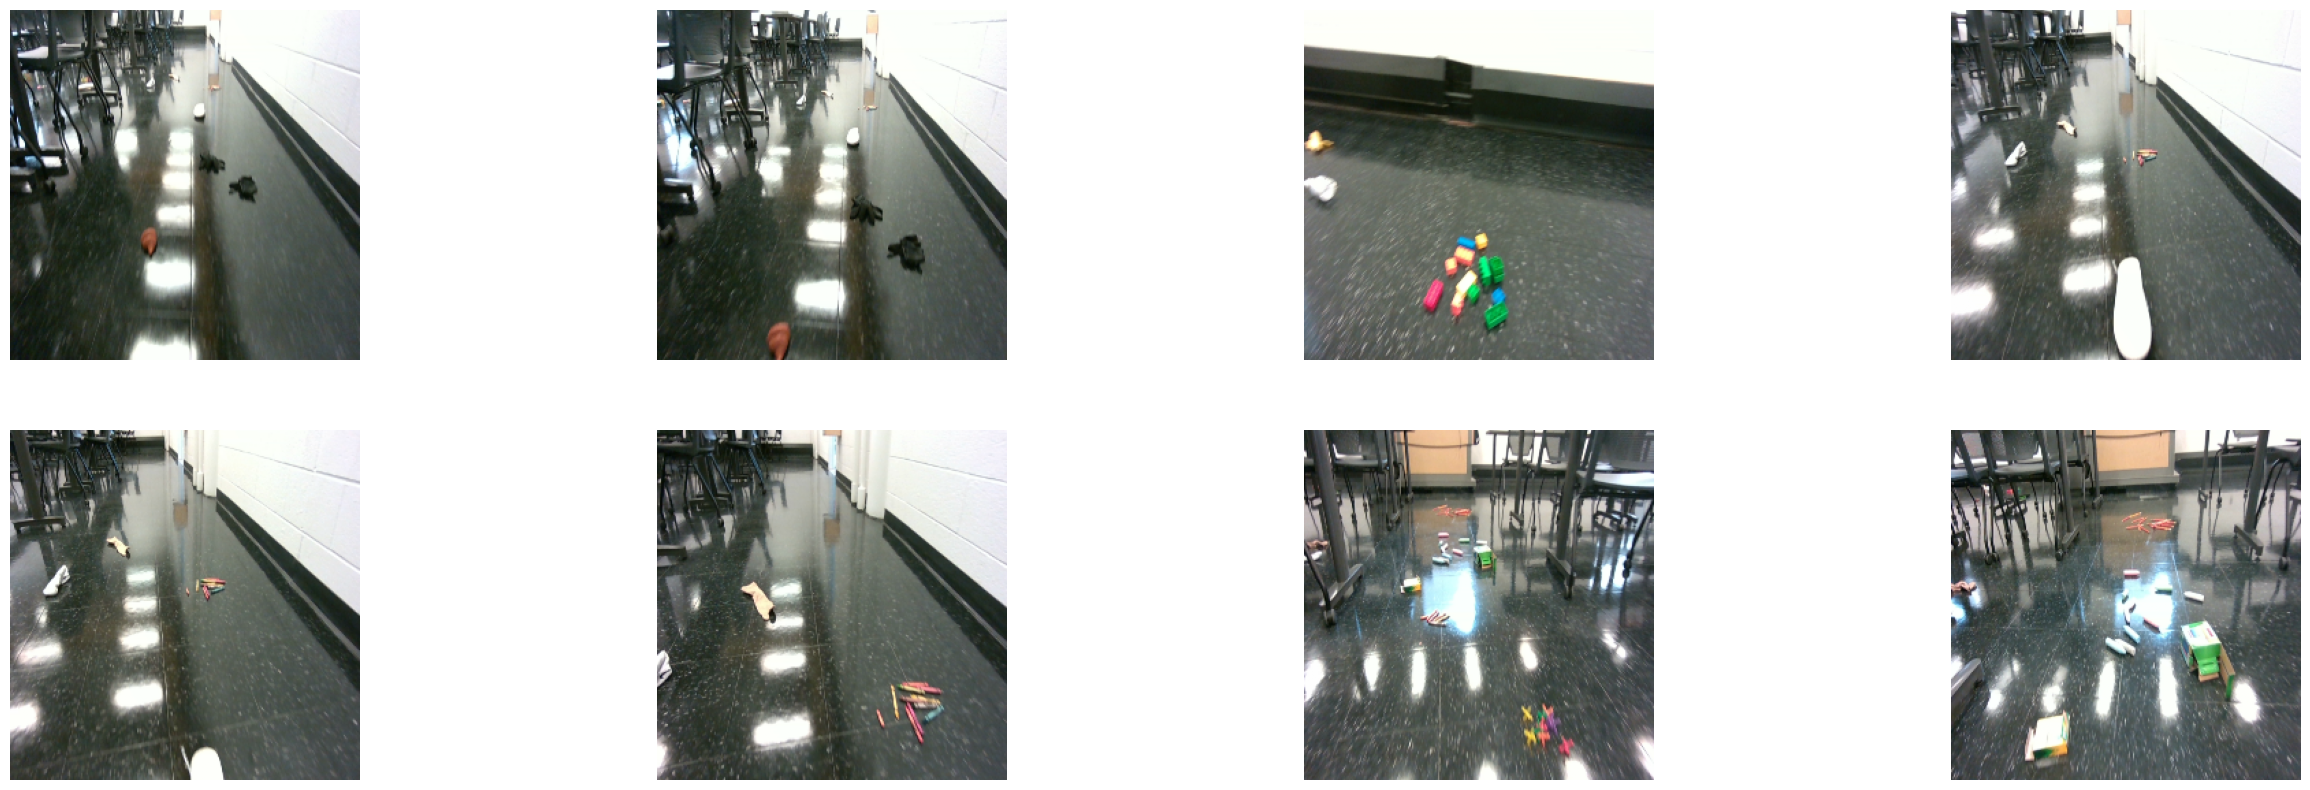

In [181]:
show_images(X, 10, 17)

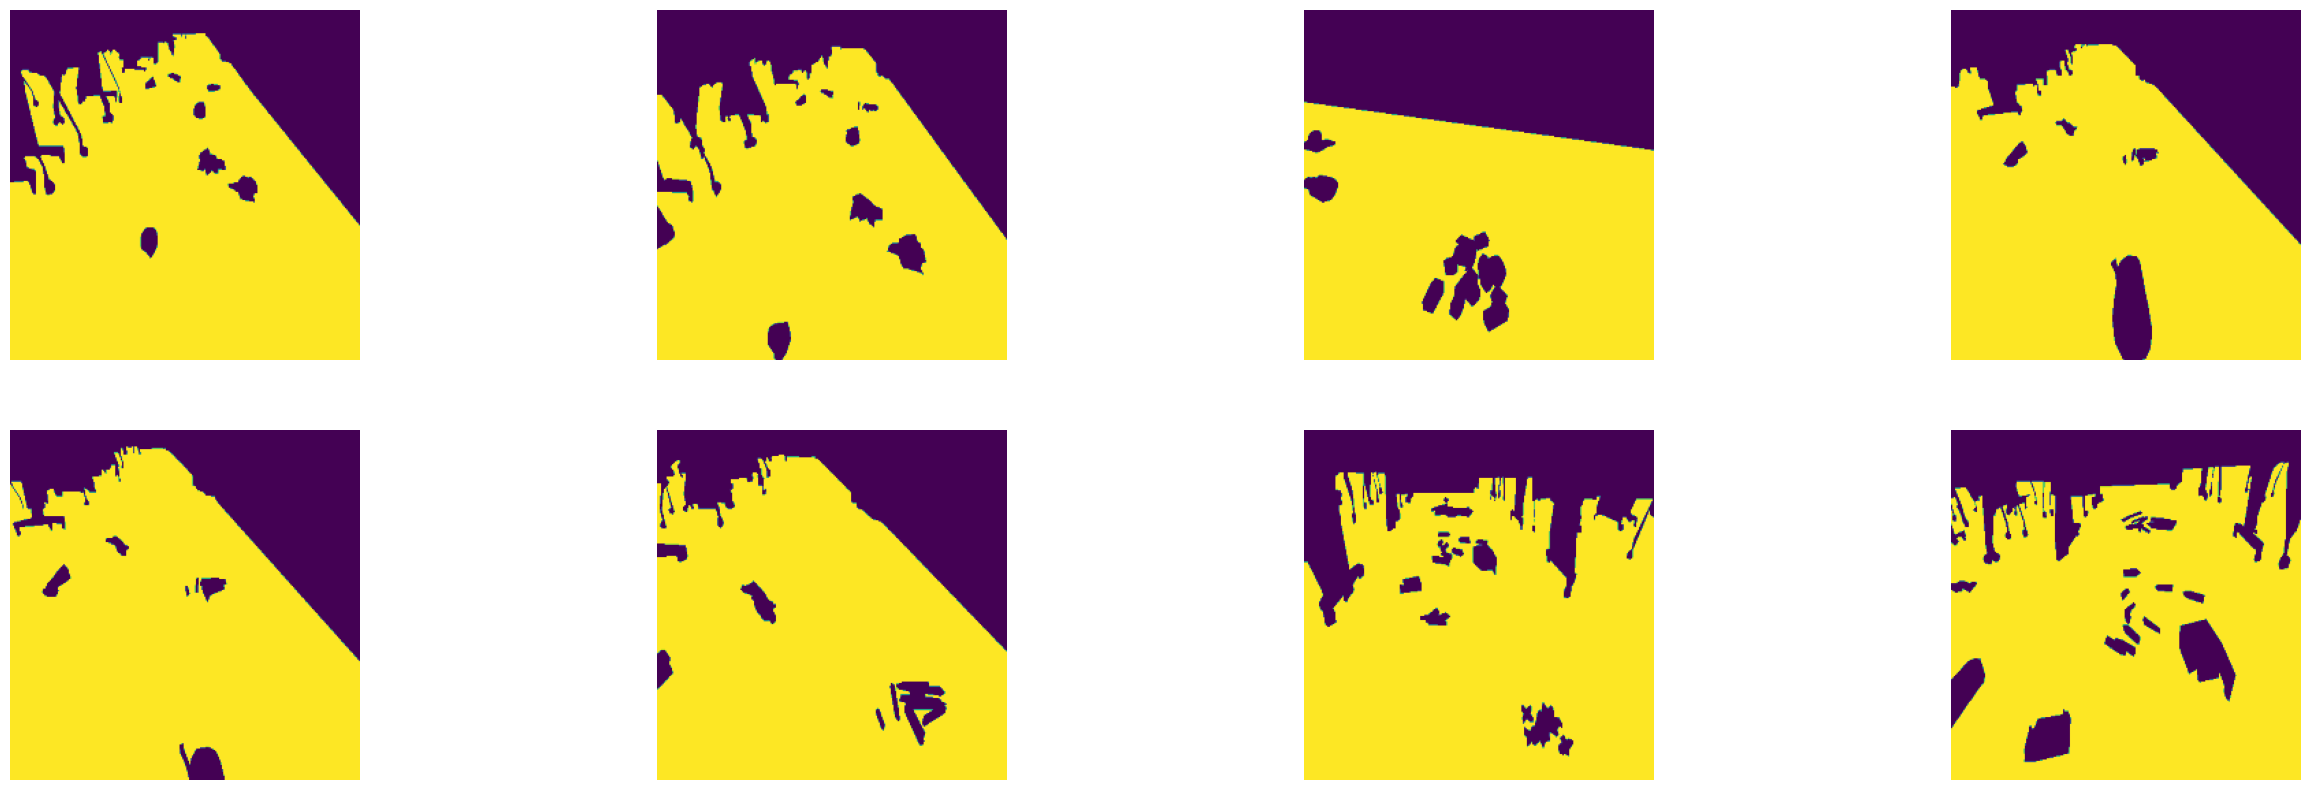

In [183]:
show_images(y, 10, 17)

In [245]:
# split data into 80/20 ratio
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, 
                                                      random_state=0
                                                     )
# develop tf Dataset objects
train_X = tf.data.Dataset.from_tensor_slices(train_X)
val_X = tf.data.Dataset.from_tensor_slices(val_X)

train_y = tf.data.Dataset.from_tensor_slices(train_y)
val_y = tf.data.Dataset.from_tensor_slices(val_y)

# verify the shapes and data types
train_X.element_spec, train_y.element_spec, val_X.element_spec, val_y.element_spec

(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(256, 256, 1), dtype=tf.uint8, name=None),
 TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(256, 256, 1), dtype=tf.uint8, name=None))

In [246]:
# zip images and masks
train = tf.data.Dataset.zip((train_X, train_y))
val = tf.data.Dataset.zip((val_X, val_y))

In [247]:
#setting the batch size
BATCH = 64

AT = tf.data.AUTOTUNE
#buffersize
BUFFER = 1000

STEPS_PER_EPOCH = 800//BATCH
VALIDATION_STEPS = 200//BATCH

train = train.cache().shuffle(BUFFER).batch(BATCH).repeat()
train = train.prefetch(buffer_size=AT)
val = val.batch(BATCH)

In [46]:
# Use pre-trained DenseNet121 without head
base = keras.applications.DenseNet121(input_shape=[IMAGE_HEIGHT, IMAGE_WIDTH, 3], 
                                      include_top=False, 
                                      weights='imagenet')

I0000 00:00:1742432113.672588   27547 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14432 MB memory:  -> device: 0, name: Quadro RTX 5000 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5


In [47]:
#final ReLU activation layer for each feature map size, i.e. 4, 8, 16, 32, and 64, required for skip-connections
skip_names = ['conv1_relu', # size 64*64
             'pool2_relu',  # size 32*32
             'pool3_relu',  # size 16*16
             'pool4_relu',  # size 8*8
             'relu'        # size 4*4
             ]

In [48]:
#output of these layers
skip_outputs = [base.get_layer(name).output for name in skip_names]
#Building the downstack with the above layers. We use the pre-trained model as such, without any fine-tuning.
downstack = keras.Model(inputs=base.input,
                       outputs=skip_outputs)
# freeze the downstack layers
downstack.trainable = False

In [49]:
upstack = [pix2pix.upsample(512,3),
          pix2pix.upsample(256,3),
          pix2pix.upsample(128,3),
          pix2pix.upsample(64,3)]

In [50]:
# define the input layer
inputs = keras.layers.Input(shape=[IMAGE_HEIGHT, IMAGE_WIDTH, 3])

# downsample 
down = downstack(inputs)
out = down[-1]

# prepare skip-connections
skips = reversed(down[:-1])
# choose the last layer at first 4 --> 8

# upsample with skip-connections
for up, skip in zip(upstack,skips):
    out = up(out)
    out = keras.layers.Concatenate()([out,skip])
    
# define the final transpose conv layer
# image 128 by 128 with 2 classes
out = keras.layers.Conv2DTranspose(2, 3,
                                  strides=2,
                                  padding='same',
                                  )(out)
# complete unet model
unet = keras.Model(inputs=inputs, outputs=out)

In [51]:
# compiling the model 
def Compile_Model():
    unet.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy']) 
Compile_Model()

In [52]:
#training and fine-tuning
hist_1 = unet.fit(train,
               validation_data=val,
               steps_per_epoch=STEPS_PER_EPOCH,
               validation_steps=VALIDATION_STEPS,
               epochs=20,
               verbose=2)

AttributeError: 'Functional' object has no attribute 'fit_generator'